In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
Stroke=pd.read_csv("Strokedataset.csv")
Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Questions to ask:
1) Male/Female who has more strokes.

2) People of which age group are more likely to get a stroke.

3) Is hypertension a cause?

4) A person with heart disease is more likely to get a stroke (need confirmation).

5) Marriage may be a cause of strokes.

6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

7) People living in urban areas have more chances of getting stroke? (need to confirm)

8) Glucose levels are important and must be observed closely with other things.

9) BMI must be closely observed with age and gender.

10) People who smoke are more likely to get a stroke (need confirmation).


In [3]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
Stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Finding missing values


In [5]:
Stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_nan_test = Stroke[Stroke.bmi.isna()]
df_nan_test


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
df_nan_test.stroke.value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [8]:
Stroke['bmi'].fillna(Stroke['bmi'].median(), inplace=True)

In [9]:
Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
Stroke.to_csv('Clean_Stroke.csv')

In [11]:
#NUMERICAL COLUMNS
numerical_cols = Stroke.columns[Stroke.dtypes != object]
numerical_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [12]:
Stroke.drop('id',axis='columns', inplace=True)

In [13]:
Stroke.shape

(5110, 11)

In [14]:
#CATEGORICAL COLUMNS
categorical_cols=Stroke.columns[Stroke.dtypes==object]
categorical_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [15]:
sn.set_context("paper", font_scale=1.9) 

# UNIVARIATE ANALYSIS

CONTINUOUS VARIABLES


<AxesSubplot:xlabel='age'>

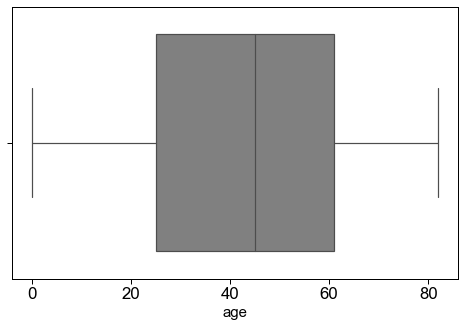

In [16]:
plt.figure(figsize=(8,5))
plt.xlabel('age',fontsize=15)
sn.set_style('darkgrid')
#sn.set_context("poster")
sn.boxplot(x='age',data=Stroke,color='Grey')


hypertension
0    90.254403
1     9.745597
Name: hypertension, dtype: float64

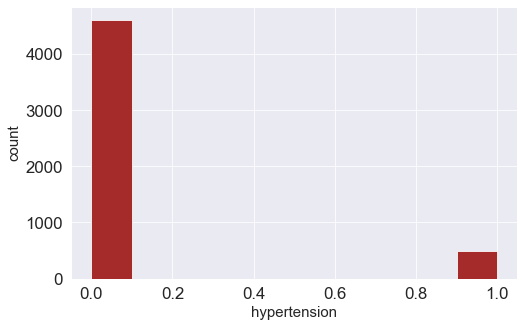

In [17]:
Stroke['hypertension'].hist(color='brown',bins=10,figsize=(8,5))
plt.xlabel('hypertension',fontsize=15)
plt.ylabel('count',fontsize=15)
Stroke.groupby('hypertension')['hypertension'].count().apply(lambda x: x* 100/ len(Stroke))

90% of population do not have hypertension

heart_disease
0    94.598826
1     5.401174
Name: heart_disease, dtype: float64

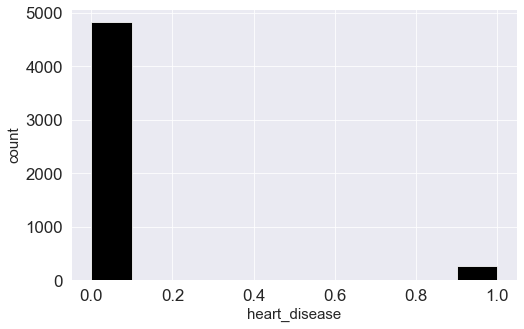

In [18]:
Stroke['heart_disease'].hist(color='black',bins=10,figsize=(8,5))
plt.xlabel('heart_disease',fontsize=15)
plt.ylabel('count',fontsize=15)
Stroke.groupby('heart_disease')['heart_disease'].count().apply(lambda x: x* 100/ len(Stroke))

94% of population do not have heartdisease

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

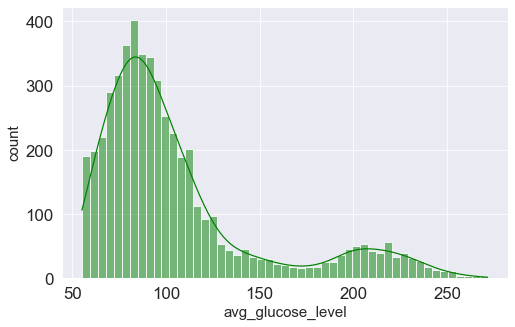

In [19]:
#KDE-Kernal density line
plt.figure(figsize=(8,5))
plt.xlabel('avg_glucose_level',fontsize=15)
plt.ylabel('count',fontsize=15)
sn.histplot(Stroke['avg_glucose_level'],kde=True,color='green')

<AxesSubplot:xlabel='bmi', ylabel='count'>

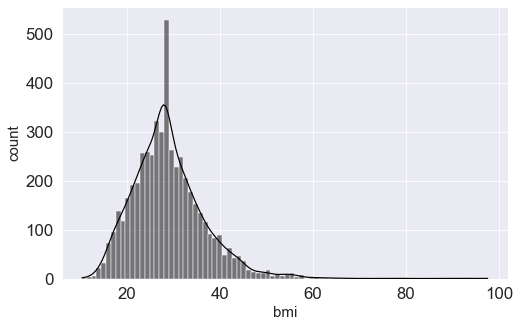

In [20]:
#sn.boxplot(x="bmi",data=Stroke,color="black")
plt.figure(figsize=(8,5))
plt.xlabel('bmi',fontsize=15)
plt.ylabel('count',fontsize=15)
sn.histplot(Stroke['bmi'],color='black',kde=True)

CATEGORICAL VARIABLES


Text(0, 0.5, 'Per Gender')

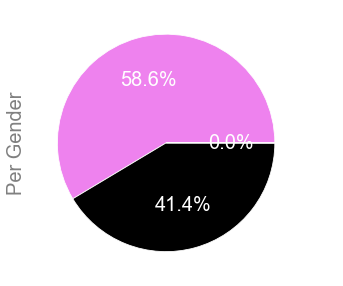

In [21]:
plt.figure(figsize=(8,5))
Stroke.groupby('gender').size().plot(kind='pie',textprops={'fontsize': 20,'color':'white'},colors=['violet', 'black'],autopct='%1.1f%%')
plt.ylabel('Per Gender',size=20,color='Grey')

ever_married
No     34.383562
Yes    65.616438
Name: ever_married, dtype: float64

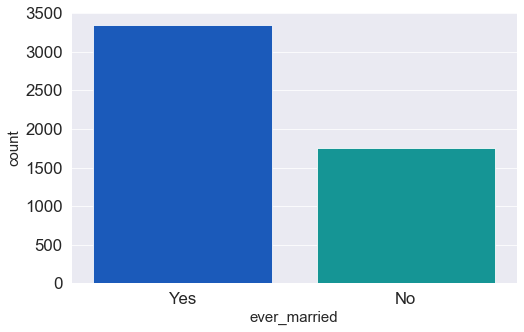

In [22]:
plt.figure(figsize=(8,5))
sn.countplot(x="ever_married",data=Stroke,palette="winter")
plt.xlabel("ever_married",fontsize=15)
plt.ylabel("count",fontsize=15)
Stroke.groupby('ever_married')['ever_married'].count().apply(lambda x: x* 100/ len(Stroke))

work_type
Govt_job         12.857143
Never_worked      0.430528
Private          57.240705
Self-employed    16.027397
children         13.444227
Name: work_type, dtype: float64

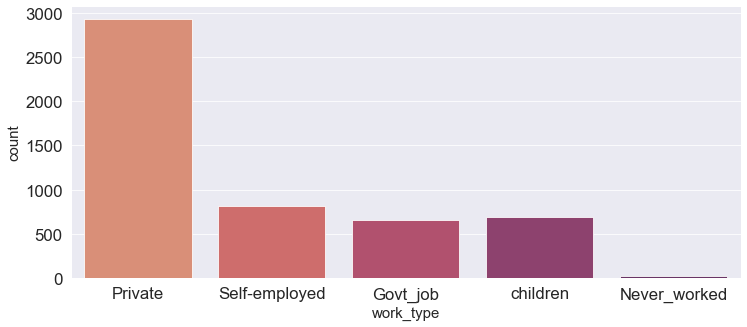

In [23]:
plt.figure(figsize=(12,5))
sn.countplot(x='work_type',data=Stroke,palette='flare')
plt.xlabel('work_type',fontsize=15)
plt.ylabel('count',fontsize=15)
Stroke.groupby('work_type')['work_type'].count().apply(lambda x: x* 100/ len(Stroke))


Residence_type
Rural    49.197652
Urban    50.802348
Name: Residence_type, dtype: float64

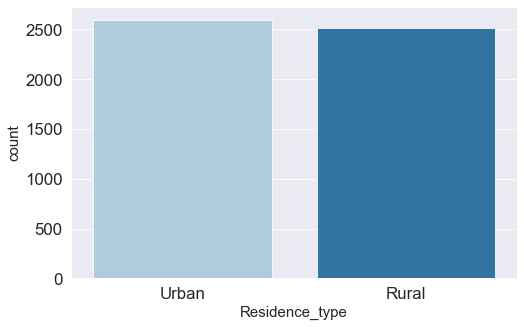

In [24]:
plt.figure(figsize=(8,5))
sn.countplot(x='Residence_type',data=Stroke,palette='Paired')
plt.xlabel("Residence_type",fontsize=15)
plt.ylabel("count",fontsize=15)
Stroke.groupby('Residence_type')['Residence_type'].count().apply(lambda x: x* 100/ len(Stroke))

smoking_status
Unknown            30.215264
formerly smoked    17.318982
never smoked       37.025440
smokes             15.440313
Name: smoking_status, dtype: float64

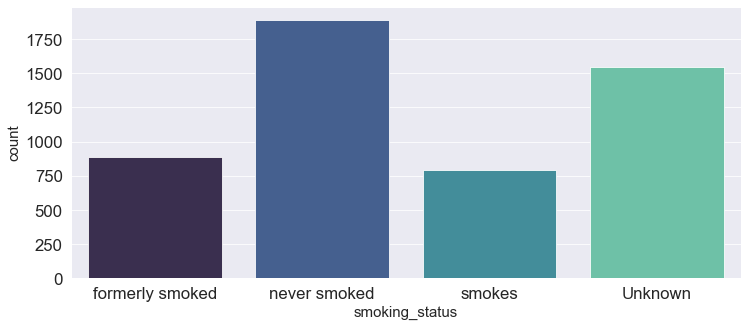

In [25]:
plt.figure(figsize=(12,5))
sn.countplot(x="smoking_status",data=Stroke,palette="mako")
plt.xlabel("smoking_status",fontsize=15)
plt.ylabel("count",fontsize=15)
Stroke.groupby('smoking_status')['smoking_status'].count().apply(lambda x: x* 100/ len(Stroke))

# BIVARIATE ANALYSIS

CONTINUOUS VARIABLES

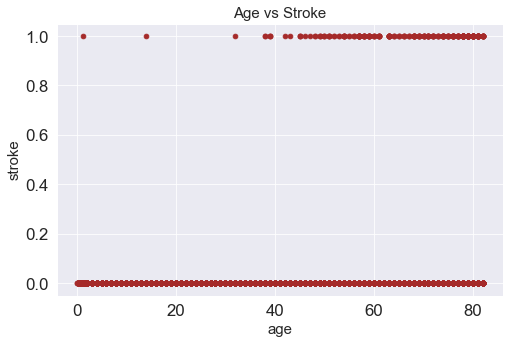

Text(0, 0.5, 'age')

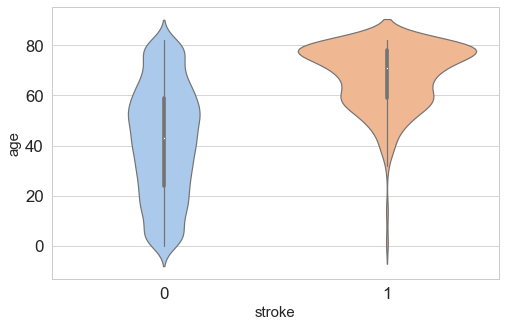

In [26]:
#Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(Stroke['age'],Stroke['stroke'],color='brown')
plt.xlabel('age',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Age vs Stroke',fontsize=15)
plt.show()
#Violin Plot
plt.figure(figsize=(8,5))
sn.set_style('whitegrid')
sn.violinplot(x='stroke',y='age',data=Stroke,palette='pastel')
plt.xlabel('stroke',fontsize=15)
plt.ylabel('age',fontsize=15)

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
dtype: int64

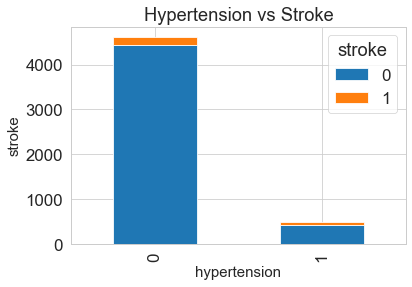

In [27]:
pd.crosstab(Stroke['hypertension'],Stroke['stroke']).plot(kind='bar',stacked=True)
plt.xlabel('hypertension',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Hypertension vs Stroke')
Stroke.groupby(['hypertension','stroke'],axis=0).size()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
dtype: int64

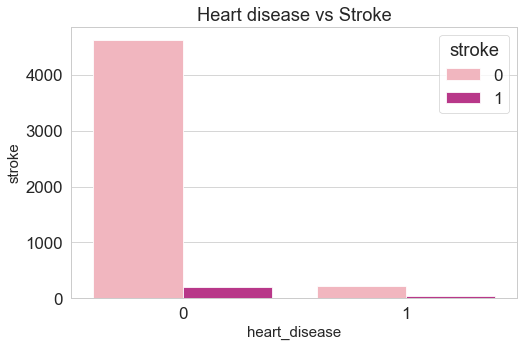

In [28]:
plt.figure(figsize=(8,5))
sn.countplot(x='heart_disease',hue='stroke',data=Stroke,palette='RdPu')
plt.xlabel('heart_disease',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Heart disease vs Stroke')
Stroke.groupby(['heart_disease','stroke']).size()

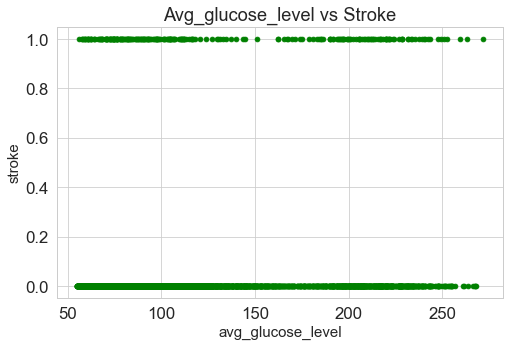

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(Stroke['avg_glucose_level'],Stroke['stroke'],color='green')
plt.xlabel('avg_glucose_level',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Avg_glucose_level vs Stroke')
plt.show()

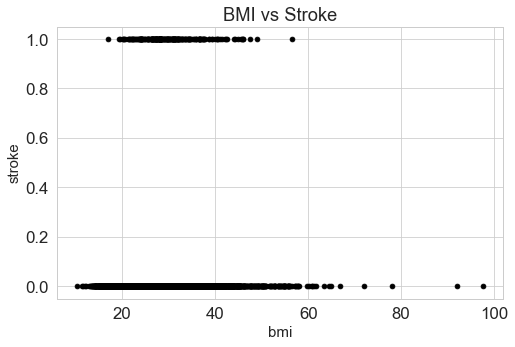

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(Stroke['bmi'],Stroke['stroke'],color='black')
plt.xlabel('bmi',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('BMI vs Stroke')
plt.show()

CATEGORICAL VARIABLES

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64

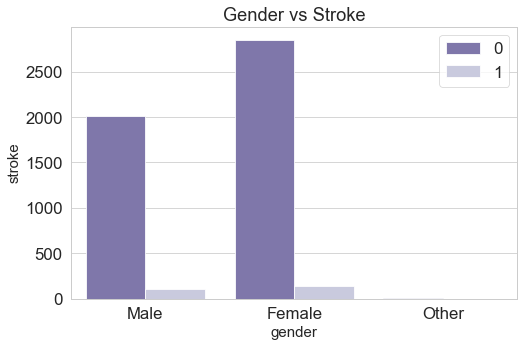

In [31]:
plt.figure(figsize=(8,5))
sn.countplot(x='gender',hue='stroke',data=Stroke,palette='Purples_r')
plt.xlabel('gender',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Gender vs Stroke')
plt.legend(loc='upper right')
Stroke.groupby(['gender','stroke']).size()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64

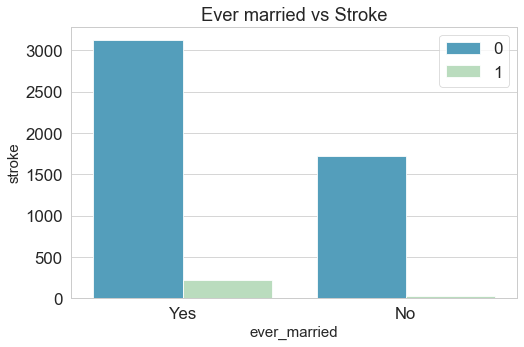

In [32]:
plt.figure(figsize=(8,5))
sn.countplot(x='ever_married',hue='stroke',data=Stroke,palette='GnBu_r')
plt.xlabel('ever_married',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Ever married vs Stroke')
plt.legend(loc='upper right')
Stroke.groupby(['ever_married','stroke']).size()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
dtype: int64

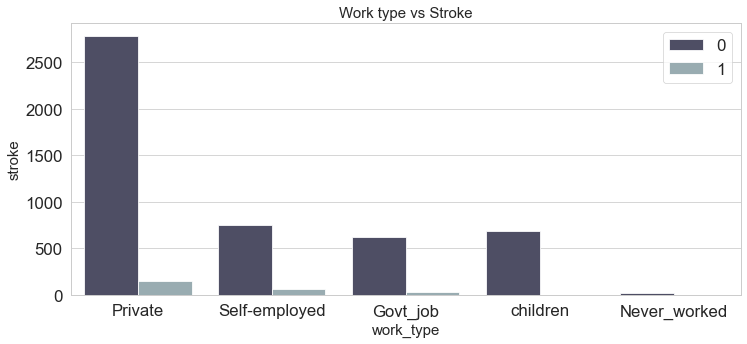

In [33]:
plt.figure(figsize=(12,5))
sn.countplot(x='work_type',hue='stroke',data=Stroke,palette='bone')
plt.xlabel('work_type',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Work type vs Stroke',fontsize=15)
plt.legend(loc='upper right')
Stroke.groupby(['work_type','stroke']).size()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
dtype: int64

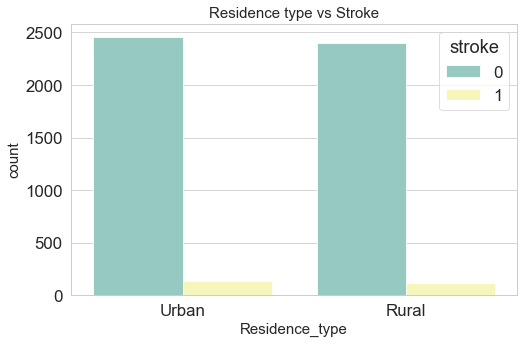

In [34]:
plt.figure(figsize=(8,5))
plt.xlabel('Residence_type',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Residence type vs Stroke',fontsize=15)
sn.countplot(x='Residence_type',hue='stroke',data=Stroke,palette='Set3')
Stroke.groupby(['Residence_type','stroke']).size()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
dtype: int64

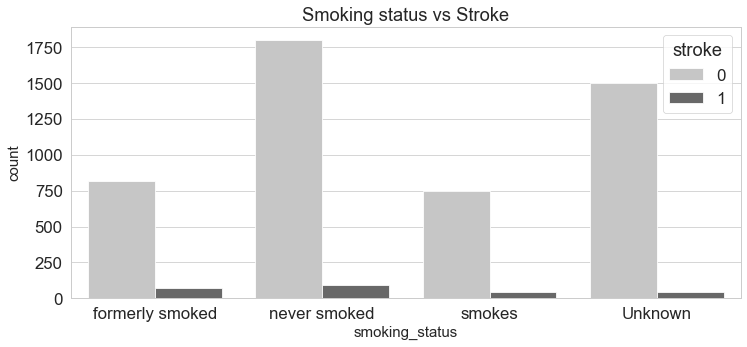

In [35]:
plt.figure(figsize=(12,5))
plt.xlabel('smoking_status',fontsize=15)
plt.ylabel('stroke',fontsize=15)
plt.title('Smoking status vs Stroke')
sn.countplot(x='smoking_status',hue='stroke',data=Stroke,palette='Greys')
Stroke.groupby(['smoking_status','stroke']).size()

In [36]:
class_stroke=Stroke['stroke'].value_counts()

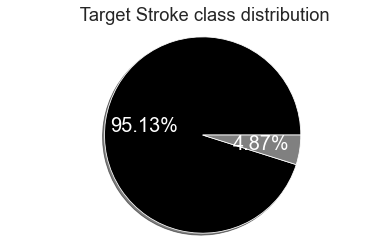

Stroke class 0 : 4861
Stroke class 1 : 249


In [37]:

class_names=['No Stroke','Stroke']
fig,ax=plt.subplots()
ax.pie(class_stroke, labels=class_names, autopct='%1.2f%%', textprops={'fontsize': 20,'color':'white'}
       ,shadow=True, startangle=0,colors=['black','Grey'])
ax.axis('equal') # equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title(" Target Stroke class distribution")
plt.show()
print('Stroke class 0 : {}'.format(class_stroke[0]))
print('Stroke class 1 : {}'.format(class_stroke[1]))

# LABELBINARIZER FOR CATEGORICAL VARIABLES

In [38]:
Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
Stroke['gender']= label_encoder.fit_transform(Stroke['gender']) 
Stroke['ever_married']= label_encoder.fit_transform(Stroke['ever_married']) 
Stroke['work_type']= label_encoder.fit_transform(Stroke['work_type']) 
Stroke['Residence_type']= label_encoder.fit_transform(Stroke['Residence_type']) 
Stroke['smoking_status']= label_encoder.fit_transform(Stroke['smoking_status']) 
Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


<AxesSubplot:>

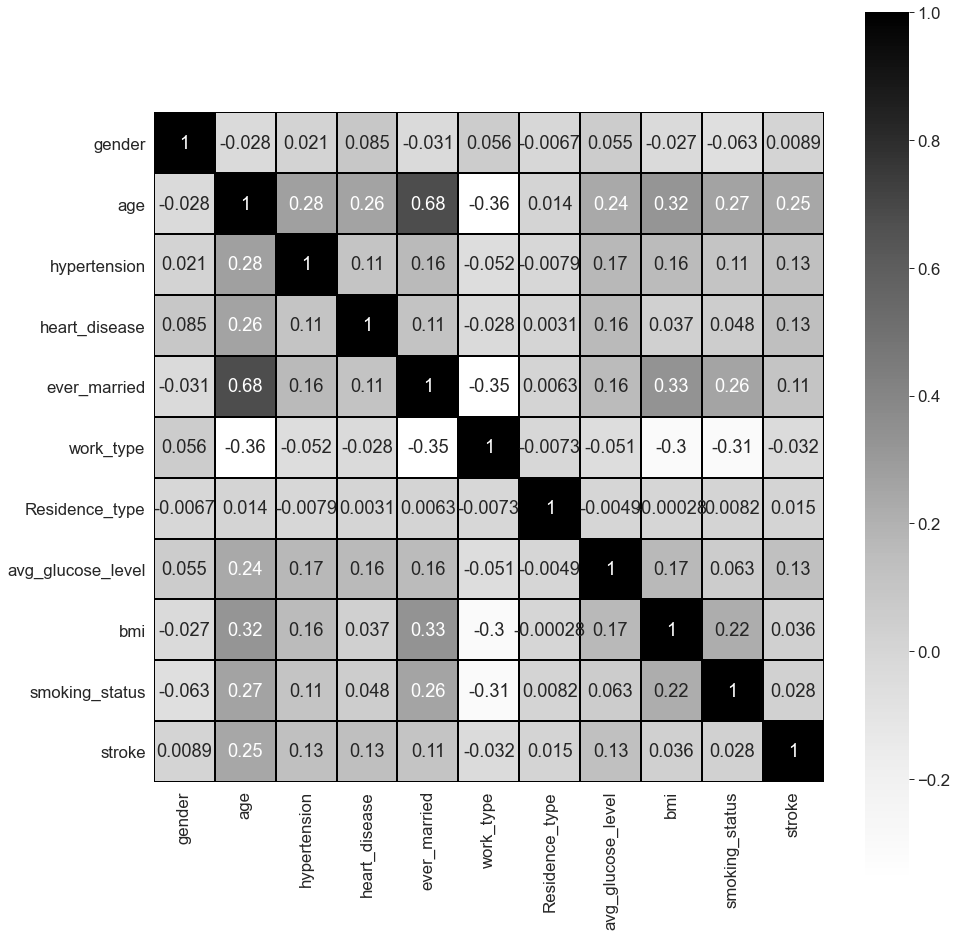

In [40]:
plt.figure(figsize=(15,16))
sn.heatmap(Stroke.corr(),annot=True,square=True,linewidth=2,cmap="Greys",linecolor='black')

# CREATING X and Y VARIABLES

In [41]:
x=Stroke.iloc[:,:-1].values
x.shape

(5110, 10)

In [42]:
y=Stroke.iloc[:,-1].values
y.shape

(5110,)

In [43]:
Stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# BALANCING DATA USING SMOTE

In [44]:
from imblearn.combine import SMOTEENN
from collections import Counter

In [45]:
smote = SMOTEENN()

In [46]:
x_oversample, y_oversample = smote.fit_resample(x, y)
print(sorted(Counter(y_oversample).items()),y_oversample.shape)

[(0, 3655), (1, 4585)] (8240,)


# TRAINING AND TESTING DATA

In [47]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_train,x_test,y_train,y_test=train_test_split(x_oversample,y_oversample,test_size=0.2,shuffle='False',random_state=0)

In [48]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6592, 10) (1648, 10) (6592,) (1648,)


In [49]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 3676, 0: 2916})
Counter({1: 909, 0: 739})


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<AxesSubplot:>

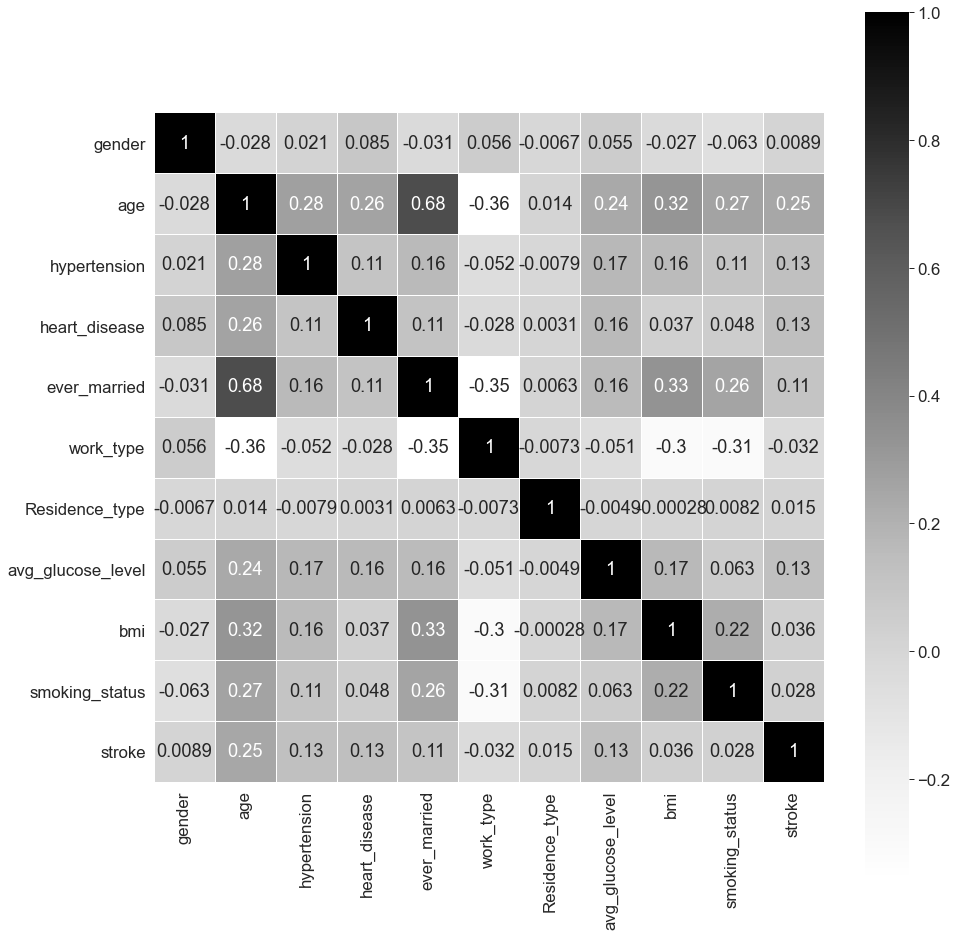

In [51]:
plt.figure(figsize=(15,16))
sn.heatmap(Stroke.corr(),annot=True,square=True,linewidth=1,cmap="Greys")

 # HYPERPARAMETER TUNING USING GridSearchCV

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5,10], 
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10]}

In [54]:

print(param_grid)

{'bootstrap': [True], 'max_depth': [5, 10], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10]}


In [55]:
rf_Model = RandomForestClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 1)

In [57]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=8; total time=   0.0s
[CV] END bootstrap=

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             verbose=2)

In [58]:
rf_Grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=9)

In [59]:
grid_pred=rf_Grid.predict(x_test)

In [60]:
rf_Grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 9}

In [61]:
#from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,precision_score
#print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
#print(accuracy_score(y_test,grid_pred))

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,grid_pred))
confusion1= confusion_matrix(y_test,grid_pred)
print(confusion1)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       739
           1       0.98      0.96      0.97       909

    accuracy                           0.97      1648
   macro avg       0.97      0.97      0.97      1648
weighted avg       0.97      0.97      0.97      1648

[[717  22]
 [ 34 875]]


# BUILDING MODEL

Random forest classifier

In [63]:
rnf=RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=10,random_state=0)

In [64]:
rnf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=10,
                       random_state=0)

In [65]:
prediction=rnf.predict(x_test)
print(prediction)

[1 1 0 ... 1 0 1]


In [66]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,precision_score
accu_RandomForest=accuracy_score(y_test,prediction)
print(accu_RandomForest)
p=rnf.score(x_train,y_train)
print(p)

0.9617718446601942
0.9817961165048543


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       739
           1       0.97      0.96      0.97       909

    accuracy                           0.96      1648
   macro avg       0.96      0.96      0.96      1648
weighted avg       0.96      0.96      0.96      1648

[[712  27]
 [ 36 873]]


<AxesSubplot:>

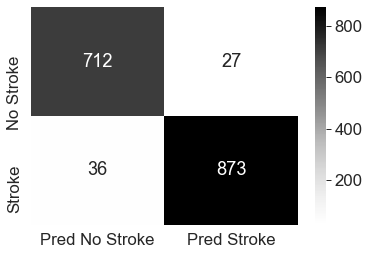

In [67]:
print(classification_report(y_test,prediction))
confusion= confusion_matrix(y_test,prediction)
print(confusion)
sn.heatmap(confusion_matrix(y_test, prediction),
    cmap = "Greys",
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

XG-Boost

In [68]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(max_depth=10, max_features='log2', n_estimators=10,random_state=0)

In [69]:
xgboost.fit(x_train,y_train)
y_pred = xgboost.predict(x_test)

[00:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


b:\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [70]:
accu_XGboost=accuracy_score(y_test,y_pred)
print(accu_XGboost)
q=xgboost.score(x_train,y_train)
print(q)

0.9781553398058253
0.9948422330097088


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       739
           1       0.99      0.97      0.98       909

    accuracy                           0.98      1648
   macro avg       0.98      0.98      0.98      1648
weighted avg       0.98      0.98      0.98      1648

[[726  13]
 [ 23 886]]


<AxesSubplot:>

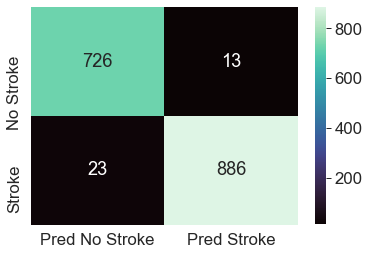

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

sn.heatmap(confusion_matrix(y_test, y_pred),
    cmap ="mako",
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [72]:
models = pd.DataFrame({
    'Model': ['Random Forest','XG-Boost'],
    'Accuracytrain':[p,q],'Accuracy test': [accu_RandomForest,accu_XGboost]})
models.sort_values(by='Accuracy test',ascending=False)

,Model,Accuracytrain,Accuracy test
1,XG-Boost,0.994842,0.978155
0,Random Forest,0.981796,0.961772


In [73]:
model=xgboost

In [74]:
import pickle
pickle_out = open("model.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()